## Customer Churn Dataset ##
#### The Analysis : Analyze why a customer churns
#### The Goal : see how we can retain the customer

## Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Reading CSV file and loading into DataFrame

In [33]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


((7043, 21), None)

In [34]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df.describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


### No NULL values in the dataset

## Data Cleaning

In [39]:
print('customerID: ',df['customerID'].nunique())
print('gender: ',df['gender'].unique())
print('SeniorCitizen:',df['SeniorCitizen'].unique())
print('Partner:',df['Partner'].unique())
print('Dependents:',df['Dependents'].unique())
print('tenure:',df['tenure'].unique())
print('PhoneService:',df['PhoneService'].unique())
print('MultipleLines:',df['MultipleLines'].unique())
print('InternetService:',df['InternetService'].unique())
print('OnlineSecurity:',df['OnlineSecurity'].unique())
print('OnlineBackup:',df['OnlineBackup'].unique())
print('DeviceProtection:',df['DeviceProtection'].unique())
print('TechSupport:',df['TechSupport'].unique())
print('StreamingTV:',df['StreamingTV'].unique())
print('StreamingMovies:',df['StreamingMovies'].unique())
print('Contract:',df['Contract'].unique())
print('PaperlessBilling:',df['PaperlessBilling'].unique())
print('PaymentMethod:',df['PaymentMethod'].unique())
print('MonthlyCharges:',df['MonthlyCharges'].nunique())
print('TotalCharges:',df['TotalCharges'].nunique())
print('Churn:',df['Churn'].unique())

customerID:  7043
gender:  ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: 1585
TotalCharges: 6531
Churn: [

In [136]:
print(df['MonthlyCharges'].head(5).sort_values())
print(df['MonthlyCharges'].tail(5).sort_values())
df.loc[df['MonthlyCharges'].isna()]

0    29.85
3    42.30
2    53.85
1    56.95
4    70.70
Name: MonthlyCharges, dtype: float64
7040     29.60
7041     74.40
7038     84.80
7039    103.20
7042    105.65
Name: MonthlyCharges, dtype: float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tengrp


In [143]:
print(df['TotalCharges'].head(5).sort_values())
print(df['TotalCharges'].tail(5).sort_values())
df.loc[df['TotalCharges'].isna()]

2     108.15
4     151.65
3    1840.75
1     1889.5
0      29.85
Name: TotalCharges, dtype: object
7038    1990.5
7041     306.6
7040    346.45
7042    6844.5
7039    7362.9
Name: TotalCharges, dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tengrp


In [146]:
df[df['TotalCharges'].str.contains(" ", na=False)].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tengrp
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,55 to 72
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,55 to 72
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,55 to 72


In [148]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

In [149]:
df[df['TotalCharges'].str.contains(" ", na=False)].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tengrp


In [150]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [222]:
df['TotalCharges'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
TotalCharges,7032.0,2283.300441,2266.771362,18.8,401.45,1397.475,3794.7375,8684.8


In [228]:
df['TotalCharges'].median()

np.float64(1397.475)

In [231]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\Monisha R\AppData\Local\Temp\ipykernel_1624\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [152]:
## No cleaning needed, the data seems to be fine. Only TotalCharges column was converted from String to Float

## Data Analaysis

## Univariate Analysis

In [139]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [140]:
df['SeniorCitizen'].value_counts(normalize=True)*100

SeniorCitizen
0    83.785319
1    16.214681
Name: proportion, dtype: float64

In [141]:
## 83% of the customers are non-senior citizens
## Only 16% of the customers are Senior citizens

In [50]:
df['Partner'].value_counts(normalize=True)*100

Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64

In [53]:
df['Dependents'].value_counts(normalize=True)*100

Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64

In [54]:
## 70% of the customers are independent Customers

In [65]:
df['tenure'].value_counts().sort_values(ascending=False)

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [68]:
df['tenure'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0


In [233]:
tengrp = []
for i in df['tenure']:
    if 0<i<=12:
        tengrp.append('1 year')
    elif 13<i<=24:
        tengrp.append('2 year')
    elif 25<i<=36:
        tengrp.append('3 year')
    elif 37<i<=48:
        tengrp.append('4 year')
    elif 49<i<=60:
        tengrp.append('5 year')
    else:
        tengrp.append('6+ year')

In [234]:
df['tengrp'] = tengrp

In [235]:
df['tengrp'].value_counts()

tengrp
1 year     2175
6+ year    1737
2 year      915
5 year      766
3 year      753
4 year      697
Name: count, dtype: int64

In [236]:
df.groupby('tengrp')['Churn'].value_counts(normalize=True)*100

tengrp   Churn
1 year   No       52.321839
         Yes      47.678161
2 year   No       72.021858
         Yes      27.978142
3 year   No       79.150066
         Yes      20.849934
4 year   No       81.348637
         Yes      18.651363
5 year   No       86.292428
         Yes      13.707572
6+ year  No       89.407024
         Yes      10.592976
Name: proportion, dtype: float64

## more years of tenure = more customer retention
## less years of tenure = more customer churn

In [83]:
df['PhoneService'].value_counts(normalize=True)

PhoneService
Yes    0.903166
No     0.096834
Name: proportion, dtype: float64

In [84]:
## 90% customers have Phone services

In [87]:
df['MultipleLines'].value_counts(normalize=True)*100

MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64

In [91]:
df['InternetService'].value_counts(normalize=True)*100

InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64

In [92]:
## 43% customers use fiber optic internet service

In [109]:
print(df['OnlineSecurity'].value_counts())
df['OnlineSecurity'].value_counts(normalize=True)*100

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: proportion, dtype: float64

In [96]:
## 50% approx don't ahve Online Security

In [100]:
df.groupby('OnlineSecurity')['Churn'].value_counts()

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: count, dtype: int64

In [142]:
df[['OnlineBackup','OnlineSecurity']].value_counts()

OnlineBackup         OnlineSecurity     
No                   No                     2195
No internet service  No internet service    1526
Yes                  No                     1303
                     Yes                    1126
No                   Yes                     893
Name: count, dtype: int64

In [110]:
df.groupby(['OnlineBackup','OnlineSecurity'])['Churn'].value_counts()

OnlineBackup         OnlineSecurity       Churn
No                   No                   No       1138
                                          Yes      1057
                     Yes                  No        717
                                          Yes       176
No internet service  No internet service  No       1413
                                          Yes       113
Yes                  No                   No        899
                                          Yes       404
                     Yes                  No       1007
                                          Yes       119
Name: count, dtype: int64

In [113]:
df['DeviceProtection'].value_counts(normalize=True)*100

DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: proportion, dtype: float64

In [114]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [115]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [116]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [118]:
df['Contract'].value_counts(normalize=True)

Contract
Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: proportion, dtype: float64

In [119]:
## 55% of the customers have month-to-month contract

In [121]:
df['PaperlessBilling'].value_counts(normalize=True)

PaperlessBilling
Yes    0.592219
No     0.407781
Name: proportion, dtype: float64

In [122]:
## 59% of the customers have paperless billing

In [123]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [125]:
df['MonthlyCharges'].mean()

np.float64(64.76169246059918)

In [154]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

## Bivariate Analysis

In [157]:
df.groupby('gender')['Churn'].value_counts(normalize=True)*100

gender  Churn
Female  No       73.079128
        Yes      26.920872
Male    No       73.839662
        Yes      26.160338
Name: proportion, dtype: float64

In [158]:
## 26% of customer churn in both genders. Churn is not influenced by gender

In [162]:
SC = pd.DataFrame(df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=False))
SC['%'] = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True)*100
SC

count          %
SeniorCitizen Churn                  
0             No      4508  76.393832
              Yes     1393  23.606168
1             No       666  58.318739
              Yes      476  41.681261

In [163]:
## 41% of the Senior citizen customers seem to churn

In [165]:
pt = pd.DataFrame(df.groupby('Partner')['Churn'].value_counts(normalize=False))
pt['%'] = df.groupby('Partner')['Churn'].value_counts(normalize=True)*100
pt

count          %
Partner Churn                  
No      No      2441  67.042021
        Yes     1200  32.957979
Yes     No      2733  80.335097
        Yes      669  19.664903

In [166]:
## 32% of the Customers with no partner seem to churn

In [168]:
pt = pd.DataFrame(df.groupby('Dependents')['Churn'].value_counts(normalize=False))
pt['%'] = df.groupby('Dependents')['Churn'].value_counts(normalize=True)*100
pt

count          %
Dependents Churn                  
No         No      3390  68.720860
           Yes     1543  31.279140
Yes        No      1784  84.549763
           Yes      326  15.450237

In [169]:
## 31% of the customers with NO dependents churn

In [183]:
ps = pd.DataFrame(df.groupby('PhoneService')['Churn'].value_counts())
ps['%'] = df.groupby('PhoneService')['Churn'].value_counts(normalize=True)*100
ps

count          %
PhoneService Churn                  
No           No       512  75.073314
             Yes      170  24.926686
Yes          No      4662  73.290363
             Yes     1699  26.709637

In [184]:
ms = pd.DataFrame(df.groupby('MultipleLines')['Churn'].value_counts())
ms['%'] = df.groupby('MultipleLines')['Churn'].value_counts(normalize=True)*100
ms

count          %
MultipleLines    Churn                  
No               No      2541  74.955752
                 Yes      849  25.044248
No phone service No       512  75.073314
                 Yes      170  24.926686
Yes              No      2121  71.390104
                 Yes      850  28.609896

In [186]:
ins = pd.DataFrame(df.groupby('InternetService')['Churn'].value_counts())
ins['%'] = df.groupby('InternetService')['Churn'].value_counts(normalize=True)*100
ins

count          %
InternetService Churn                  
DSL             No      1962  81.040892
                Yes      459  18.959108
Fiber optic     No      1799  58.107235
                Yes     1297  41.892765
No              No      1413  92.595020
                Yes      113   7.404980

In [187]:
## 41% of the Customers with Fiber optic choose to churn

In [188]:
os = pd.DataFrame(df.groupby('OnlineSecurity')['Churn'].value_counts())
os['%'] = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True)*100
os

count          %
OnlineSecurity      Churn                  
No                  No      2037  58.233276
                    Yes     1461  41.766724
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1724  85.388806
                    Yes      295  14.611194

In [189]:
## 41% of the customers with NO online security churn more

In [190]:
ob = pd.DataFrame(df.groupby('OnlineBackup')['Churn'].value_counts())
ob['%'] = df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True)*100
ob

count          %
OnlineBackup        Churn                  
No                  No      1855  60.071244
                    Yes     1233  39.928756
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1906  78.468506
                    Yes      523  21.531494

In [191]:
## 40% of the customers with NO online backup churn

In [192]:
dp = pd.DataFrame(df.groupby('DeviceProtection')['Churn'].value_counts())
dp['%'] = df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True)*100
dp

count          %
DeviceProtection    Churn                  
No                  No      1884  60.872375
                    Yes     1211  39.127625
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1877  77.497936
                    Yes      545  22.502064

In [193]:
## 40% of the customers with NO Device protection churn

In [194]:
ts = pd.DataFrame(df.groupby('TechSupport')['Churn'].value_counts())
ts['%'] = df.groupby('TechSupport')['Churn'].value_counts(normalize=True)*100
ts

count          %
TechSupport         Churn                  
No                  No      2027  58.364526
                    Yes     1446  41.635474
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1734  84.833659
                    Yes      310  15.166341

In [209]:
## 41% of the customers with NO tech support churn

In [196]:
st = pd.DataFrame(df.groupby('StreamingTV')['Churn'].value_counts())
st['%'] = df.groupby('StreamingTV')['Churn'].value_counts(normalize=True)*100
st

count          %
StreamingTV         Churn                  
No                  No      1868  66.476868
                    Yes      942  33.523132
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1893  69.929812
                    Yes      814  30.070188

In [208]:
## 33% of the customers with NO StreamingTV churn

In [198]:
sm = pd.DataFrame(df.groupby('StreamingMovies')['Churn'].value_counts())
sm['%'] = df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True)*100
sm

count          %
StreamingMovies     Churn                  
No                  No      1847  66.319569
                    Yes      938  33.680431
No internet service No      1413  92.595020
                    Yes      113   7.404980
Yes                 No      1914  70.058565
                    Yes      818  29.941435

In [207]:
## 33% of the customers with NO StreamingMovies churn

In [201]:
ct = pd.DataFrame(df.groupby('Contract')['Churn'].value_counts())
ct['%'] = df.groupby('Contract')['Churn'].value_counts(normalize=True)*100
ct

count          %
Contract       Churn                  
Month-to-month No      2220  57.290323
               Yes     1655  42.709677
One year       No      1307  88.730482
               Yes      166  11.269518
Two year       No      1647  97.168142
               Yes       48   2.831858

In [206]:
## 42% of the customers with Month-to-month Contract churn

In [204]:
pb = pd.DataFrame(df.groupby('PaperlessBilling')['Churn'].value_counts())
pb['%'] = df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True)*100
pb

count          %
PaperlessBilling Churn                  
No               No      2403  83.669916
                 Yes      469  16.330084
Yes              No      2771  66.434908
                 Yes     1400  33.565092

In [205]:
## 33% of the customers with paperbilling churn

In [238]:
pm = pd.DataFrame(df.groupby('PaymentMethod')['Churn'].value_counts())
pm['%'] = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True)*100
pm

count          %
PaymentMethod             Churn                  
Bank transfer (automatic) No      1286  83.290155
                          Yes      258  16.709845
Credit card (automatic)   No      1290  84.756899
                          Yes      232  15.243101
Electronic check          No      1294  54.714588
                          Yes     1071  45.285412
Mailed check              No      1304  80.893300
                          Yes      308  19.106700

In [239]:
## 45% of the customers with Electronic check churn more

In [215]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [237]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No     2552.882494
Yes    1531.796094
Name: TotalCharges, dtype: float64

## Bivariate - more than 2 cols - Analysis

In [251]:
com = pd.DataFrame(df.groupby(['SeniorCitizen','Partner','Dependents','tengrp'])['Churn'].value_counts())
com['%'] = df.groupby(['SeniorCitizen','Partner','Dependents','tengrp'])['Churn'].value_counts(normalize=True)*100
com

count          %
SeniorCitizen Partner Dependents tengrp  Churn                  
0             No      No         1 year  No       668  53.227092
                                         Yes      587  46.772908
                                 2 year  No       273  74.386921
                                         Yes       94  25.613079
                                 3 year  No       233  82.918149
...                                               ...        ...
1             Yes     Yes        4 year  Yes        5  50.000000
                                 5 year  No        10  83.333333
                                         Yes        2  16.666667
                                 6+ year No        28  87.500000
                                         Yes        4  12.500000

[89 rows x 2 columns]

In [263]:
com = pd.DataFrame(df.where((df['Partner']=='No') & (df['SeniorCitizen']==1) & (df['InternetService']=='Fiber optic') & 
                            (df['PaymentMethod']=='Electronic check') & (df['Contract']=='Month-to-month') & 
                            (df['PaperlessBilling']=='Yes')).groupby(
    ['SeniorCitizen','Partner','InternetService','PaymentMethod','Contract','PaperlessBilling','tengrp'])['Churn'].value_counts())
com['%'] = df.groupby(['SeniorCitizen','Partner','InternetService','PaymentMethod','Contract','PaperlessBilling',
                       'tengrp'])['Churn'].value_counts(normalize=True).sort_values()
com

count  \
SeniorCitizen Partner InternetService PaymentMethod    Contract       PaperlessBilling tengrp  Churn          
1.0           No      Fiber optic     Electronic check Month-to-month Yes              1 year  Yes       83   
                                                                                               No        24   
                                                                                       2 year  Yes       27   
                                                                                               No        13   
                                                                                       3 year  Yes       17   
                                                                                               No         8   
                                                                                       4 year  No         7   
                                                                                               Yes        5   
                                                                                       5 year  No         8   
                                                                                               Yes        4   
                                                                                       6+ year Yes       13   
                                                                                               No         2   

                                                                                                             %  
SeniorCitizen Partner InternetService PaymentMethod    Contract       PaperlessBilling tengrp  Churn            
1.0           No      Fiber optic     Electronic check Month-to-month Yes              1 year  Yes    0.775701  
                                                                                               No     0.224299  
                                                                                       2 year  Yes    0.675000  
                                                                                               No     0.325000  
                                                                                       3 year  Yes    0.680000  
                                                                                               No     0.320000  
                                                                                       4 year  No     0.583333  
                                                                                               Yes    0.416667  
                                                                                       5 year  No     0.666667  
                                                                                               Yes    0.333333  
                                                                                       6+ year Yes    0.866667  
                                                                                               No     0.133333

In [278]:
df['churn'] = np.where(df['Churn']=='Yes',1,0)

<Axes: >

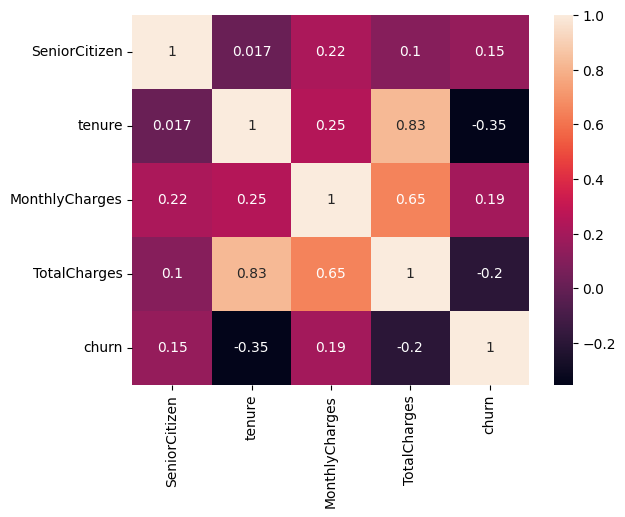

In [281]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [282]:
df['MonthlyCharges'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [283]:
mc = []
for i in df['MonthlyCharges']:
    if 0<i<=18.25:
        mc.append('<18.25')
    elif 18.25<i<=35.5:
        mc.append('18.26 to 35.5')
    elif 35.5<i<=70.35:
        mc.append('35.5 to 70.35')
    elif 70.35<i<=89.85:
        mc.append('70.35 to 89.85')
    elif 89.85<i:
        mc.append('89.85+')

In [284]:
df['mcgrp'] = mc

In [295]:
df.groupby('mcgrp')['Churn'].value_counts(normalize=True)*100

mcgrp           Churn
18.26 to 35.5   No        88.756388
                Yes       11.243612
35.5 to 70.35   No        75.424689
                Yes       24.575311
70.35 to 89.85  No        62.492886
                Yes       37.507114
89.85+          No        67.121729
                Yes       32.878271
<18.25          No       100.000000
Name: proportion, dtype: float64

In [296]:
df['TotalCharges'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
TotalCharges,7043.0,2281.916928,2265.270398,18.8,402.225,1397.475,3786.6,8684.8


In [297]:
tc = []
for i in df['TotalCharges']:
    if 0<i<=18.8:
        tc.append('<18.8')
    elif 18.8<i<=402.225:
        tc.append('18.8 to 402.225')
    elif 402.225<i<=1397.475:
        tc.append('402.225 to 1397.475')
    elif 1397.475<i<=3786.6:
        tc.append('1397.475 to 3786.6')
    elif 3786.6<i:
        tc.append('3786.6+')

In [298]:
df['tcgrp'] = tc

In [314]:
df.where((df['tengrp']=='1 year') & (df['Contract']=='Month-to-month') & (df['InternetService']=='Fiber optic')).groupby(
    ['Contract','PaymentMethod','InternetService','mcgrp','tcgrp','tengrp'])['Churn'].value_counts(normalize=True)*100

Contract        PaymentMethod              InternetService  mcgrp           tcgrp                tengrp  Churn
Month-to-month  Bank transfer (automatic)  Fiber optic      35.5 to 70.35   18.8 to 402.225      1 year  Yes      100.000000
                                                                            402.225 to 1397.475  1 year  No        75.000000
                                                                                                         Yes       25.000000
                                                            70.35 to 89.85  18.8 to 402.225      1 year  Yes       91.304348
                                                                                                         No         8.695652
                                                                            402.225 to 1397.475  1 year  Yes       70.000000
                                                                                                         No        30.000000
              

In [299]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tengrp,churn,mcgrp,tcgrp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 year,0,18.26 to 35.5,18.8 to 402.225
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3 year,0,35.5 to 70.35,1397.475 to 3786.6
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 year,1,35.5 to 70.35,18.8 to 402.225
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,4 year,0,35.5 to 70.35,1397.475 to 3786.6
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 year,1,70.35 to 89.85,18.8 to 402.225
